In [132]:
what_we_are_covering=['0. An end-to-end Scikit-Learn workflow'
'1. Getting the data ready',
'2. Choose the right estimator/algorith for our problems',
'3. Fit the model/alogrithm and use it to make predictions on our data.',
'4. Evaulating a model',
'5. Improve a model',
'6. Save and load a trained model',
'7. Putting it all together']

In [133]:
what_we_are_covering

['0. An end-to-end Scikit-Learn workflow1. Getting the data ready',
 '2. Choose the right estimator/algorith for our problems',
 '3. Fit the model/alogrithm and use it to make predictions on our data.',
 '4. Evaulating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

In [134]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


## 1.Getting our data ready to be used with machine learning

Three main things we have to do :
    1. Split the data into features and labels (usually 'X' & 'y')
    2.Filling (also called imputing ) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [135]:
heart_disease=pd.read_csv('heart-disease.csv')

heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [136]:
X = heart_disease.drop('target',axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [137]:
y= heart_disease.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [138]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [139]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [140]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2


### 1.1 Make sure its all numerical

In [141]:
car_sales=pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [142]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [143]:
len(car_sales)

1000

In [144]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [145]:
#Split the data into X,y
X=car_sales.drop('Price',axis=1)
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [146]:
y=car_sales['Price']
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [147]:
#Split the data into training and test sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
y_train

56     15662
73     12001
674    29401
526    13560
965    14691
       ...  
181    20075
875    14132
444    19629
786    20108
414     5101
Name: Price, Length: 800, dtype: int64

In [148]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor()
model.fit(X_train,y_train)

model.score(X_test,y_test)

ValueError: could not convert string to float: 'Honda'

In [150]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [151]:
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']

one_hot=OneHotEncoder()

transformer=ColumnTransformer([('one_hot',
                               one_hot,
                               categorical_features)],
                             remainder='passthrough')

transformed_X=transformer.fit_transform(X)

pd.DataFrame(transformed_X)



,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [152]:
dummies=pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [153]:
#Lets refit the model

np.random.seed(42)
X_train, X_test,y_train,y_test=train_test_split(transformed_X,
                                               y,
                                               test_size=0.2)

model.fit(X_train, y_train);

In [154]:
model.score(X_train,y_train)

0.891612713353635

In [155]:
model.score(X_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.


In [156]:
# Import car sales missing data

car_sales_missing= pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [157]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [158]:
X=car_sales_missing.drop('Price', axis=1)
y=car_sales_missing['Price']


### Option 1 : Fill missing data with Pandas

In [159]:
# Fill the 'Make' column

car_sales_missing['Make'].fillna('missing',inplace=True)

#Fill the 'Colour' column
car_sales_missing['Colour'].fillna('missing',inplace=True)

#Fill the 'Odometer (KM)' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

#Fill the 'Doors' column

car_sales_missing['Doors'].fillna(4,inplace=True)

In [160]:
#Remove rows with missing price value

car_sales_missing.dropna(inplace=True)



In [161]:
X=car_sales_missing.drop('Price', axis=1)
y=car_sales_missing['Price']

In [162]:
# Lets try and convert our data into numbers

#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']

one_hot=OneHotEncoder()

transformer=ColumnTransformer([('one_hot',
                               one_hot,
                               categorical_features)],
                             remainder='passthrough')

transformed_X=transformer.fit_transform(car_sales_missing)

transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [163]:
transformed_X[0]

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 3.5431e+04,
       1.5323e+04])

### Option 2: Fill missing values with Scikit-Learn

In [164]:
car_sales_missing=pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [165]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [166]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [167]:
#Split into X and y
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

#Split data into train and test sets

X_train,X_test,y_train,y_test= train_test_split(X,
                                               y,
                                               test_size=0.2)


In [168]:
#Fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer=SimpleImputer(strategy='constant',fill_value='missing')
door_imputer=SimpleImputer(strategy='constant',fill_value=4)
num_imputer=SimpleImputer(strategy='mean')


In [169]:
# Define different column features
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

In [170]:
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_feature)])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Toyota', 'Black', 4.0, 86696.0],
       ['Toyota', 'Black', 4.0, 20714.0],
       ['Toyota', 'White', 4.0, 134415.0],
       ...,
       ['Honda', 'Blue', 4.0, 224900.0],
       ['missing', 'White', 3.0, 19482.0],
       ['Honda', 'Blue', 4.0, 199833.0]], dtype=object)

In [171]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Black,4,86696
1,Toyota,Black,4,20714
2,Toyota,White,4,134415
3,Toyota,Green,4,130710
4,Honda,White,4,145850
...,...,...,...,...
755,Nissan,Blue,4,111256
756,Honda,White,4,246079
757,Honda,Blue,4,224900
758,missing,White,3,19482


In [172]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.66960e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.07140e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.34415e+05],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.24900e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.94820e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.99833e+05]])

In [173]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.09497633411335504

### 2. Choosing the right estimator/algorith for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm.


* Classification -predicting whether a sample is one thing or another
* Regression- predicting a number

### 2.1 Picking  a machine learning model for a regression problem

In [174]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston=load_boston()
boston


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [175]:
boston_df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target']=pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [176]:
#no of samples
len(boston_df)

506

In [177]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [178]:
# Lets try ridge regression model

from sklearn.linear_model import Ridge

#Setup random seed

np.random.seed(42)

#Create data
X=boston_df.drop('target',axis=1)
y=boston_df['target']

#Split into train and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


model=Ridge()
model.fit(X_train,y_train)

#Check the scores of model

model.score(X_test,y_test)

0.6662221670168522

How do  we improve this score?


In [179]:
# Lets try the random forest regressor
from sklearn.ensemble import RandomForestRegressor

#setup random seed

np.random.seed(42)

X=boston_df.drop('target',axis=1)
y=boston_df['target']

#Split the data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instatiate Random forest regressor

rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)


rf.score(X_test,y_test)

0.8654448653350507

In [180]:
#Check the ridge model again

model.score(X_test,y_test)

0.6662221670168522

### 2.2 Choosing an estimator for a classification problem


In [181]:
heart_disease=pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map and it says to try `LinearSVC`

In [182]:
#Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

#Make the data
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']


#Split the data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)
#Instantiate LinearSVC
model=LinearSVC(max_iter=1000);
model.fit(X_train,y_train);
#Evaluate the Linear SVC
model.score(X_test,y_test)


C:\Users\punee\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [183]:
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Make the data
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']


#Split the data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)
#Instantiate RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train);
clf.score(X_test,y_test)

0.8524590163934426

Tidbit:
   1. If u have structured data, use ensembble methods
   2. If u have unstructured data, use deep learning or transfer learning.

## 3. Fit the model/alogrithm and use it to make predictions on our data.


### 3.1 Fitting the model to the data

Different names for :
* `X`=features, features variables, data
* `y`= labels, targets, target variables

In [184]:
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Make the data
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']


#Split the data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)


#Instantiate RandomForestClassifier
clf=RandomForestClassifier()


#Fit the model to the data
clf.fit(X_train,y_train);


#Evaluate the Random Forest Classifier
clf.score(X_test,y_test)

0.8524590163934426

In [185]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [186]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1.`predict()`
2.`predict_proba()`

In [187]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [188]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [189]:
#Compare predictions to truth labels to evaulate the model

y_preds= clf.predict(X_test)

np.mean(y_preds==y_test)

0.8524590163934426

In [190]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

 Make predictions with `predict_proba()`

In [191]:
#predict_proba() returns probabilities of a classification label

clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [192]:
#Lets predict() on same data..
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [193]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models

In [194]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [195]:

from sklearn.ensemble import RandomForestRegressor


np.random.seed(42)

X=boston_df.drop('target',axis=1)
y=boston_df['target']



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)



rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)


rf.score(X_test,y_test)

y_preds=rf.predict(X_test)

In [196]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [197]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [198]:
#Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_preds)

2.136382352941176

## 4.Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric

###  4.1 Evaluating a model with `score` method

In [199]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier();
clf.fit(X_train,y_train);


In [200]:
clf.score(X_train,y_train)

1.0

In [201]:
clf.score(X_test,y_test)

0.8524590163934426

Doing the same but for regression

In [202]:

from sklearn.ensemble import RandomForestRegressor


np.random.seed(42)

X=boston_df.drop('target',axis=1)
y=boston_df['target']



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)



rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)



RandomForestRegressor()

In [203]:
rf.score(X_test,y_test)

0.8654448653350507

### 4.2 Evaluating a model using the `scoring` parameter

In [204]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier();
clf.fit(X_train,y_train);

In [205]:
clf.score(X_test,y_test)

0.8524590163934426

In [206]:
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [207]:
np.random.seed(42)

#single training and test split score

clf_single_score= clf.score(X_test,y_test)

#Take the mean of 5-fold cross-validation-score

clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5))
 #Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [208]:
#Scoring parameter set to None by default
np.random.seed(42)

cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

## 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [209]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [210]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop('target', axis=1)
y= heart_disease['target']

clf=RandomForestClassifier()
cross_val_score=cross_val_score(clf,X,y,cv=5)

In [211]:
np.mean(cross_val_score)

0.8248087431693989

In [212]:
print(f'Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%')

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**
 
* Area under curve (AUC)
* ROC curve


ROC curves are a comparison of a model's true positive rate(tpr) versus a model's false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative= model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [213]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)


In [214]:
from sklearn.metrics import roc_curve

clf.fit(X_train,y_train)

y_probs= clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [215]:
y_probs_positive= y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [216]:
#Calculate fpr,tpr and thresholds

fpr,tpr,thresholds= roc_curve(y_test, y_probs_positive)

#check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

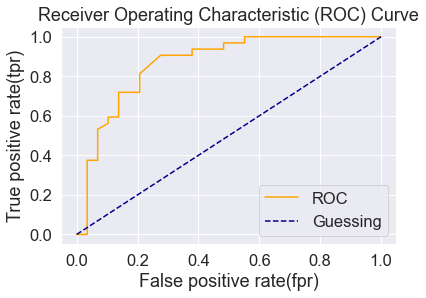

In [217]:
#Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC given the fpr and tpr of a model.
    """
    #Plot roc curve
    plt.plot(fpr,tpr,color='orange', label='ROC')
    #Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--', label='Guessing')
    
    #Customize the plot
    plt.xlabel('False positive rate(fpr)')
    plt.ylabel('True positive rate(tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    

plot_roc_curve(fpr,tpr)

In [218]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

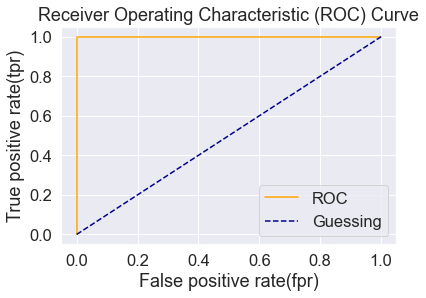

In [219]:
#Plot perfect ROC curve and AUC score
fpr,tpr,thresholds=roc_curve(y_test,y_test)

plot_roc_curve(fpr,tpr)

In [220]:
#Perfect Auc Score

roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts it was supposed to predict.

In essence, giving you an idea of where model is getting confused.

In [221]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [222]:
#Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Label'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


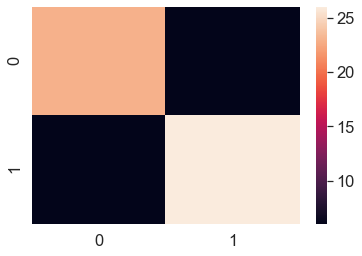

In [223]:
#Make our confusion matrix more visual with seaborn heatmap

import seaborn as sns

sns.set(font_scale=1.5)

#Create a confusion matrix

conf_mat= confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat);

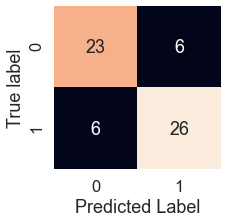

In [224]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,
                  annot=True, #Annotate the boxes with conf_mat info
                  cbar=False)
    
    ax.set(xlabel='Predicted Label',
          ylabel='True label');
    
plot_conf_mat(conf_mat)

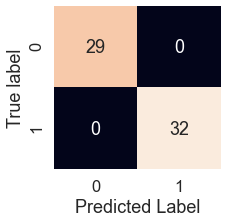

In [225]:
#Create a perfect confusion matrix

perfect_conf_mat=confusion_matrix(y_test,y_test)

plot_conf_mat(perfect_conf_mat)

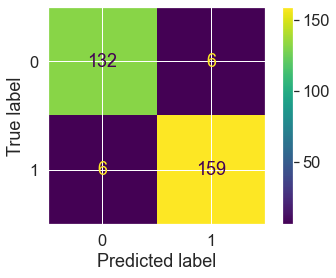

In [226]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X,y);

**Classification Report**

In [227]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [228]:
#Where precision and recall become valuable

disease_true= np.zeros(10000)
disease_true[0]=1 #only one positive case

disease_preds=np.zeros(10000) #modell predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,output_dict=True))

C:\Users\punee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

   **Accuracy** is a good measure to start with if all classes are balanced (e.g same amount of samples which are labelled with 0 or 1 )
   
   **Precision** and **recall** become more important when classes are imbalanced.
   
   
   If false positive predictions are worse than false negative, aim for higher precision
   
   
   If false negative predictions are worse than false positive, aim for higher recall
    
    
   **F1-score** is a combination of precision and recall.
   

### 4.2.2 Regression model evaluation metrics


1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean Absolute error (MAE)
3. Mean Squared error (MSE)

**R^2**

What R-squared does : compares ur models predictions to the mean of the targets. Values can range from neagtive infinity to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0.
And if your model predicts a range of numbers its R^2 value would be 1.

In [229]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=boston_df.drop('target',axis=1)
y=boston_df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train);

In [230]:
model.score(X_test, y_test)

0.8654448653350507

In [231]:
from sklearn.metrics import r2_score

#fill an array with y_test mean

y_test_mean=np.full(len(y_test),y_test.mean())

In [232]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [233]:
r2_score(y_test,y_test)

1.0

### Mean absolute error(MAE)


MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your model predictions are.

In [234]:
 #Mean absolute error
    
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(X_test)

mae=mean_absolute_error(y_test,y_preds)

mae

2.136382352941176

In [235]:
df=pd.DataFrame(data={'actual_values':y_test,
                     'predicted_values': y_preds})

df['differences']= df['predicted_values']- df['actual_values']
df

,actual_values,predicted_values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


### Mean Squared Error (MSE)

In [236]:
from sklearn.metrics import mean_squared_error

y_preds=model.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [237]:
#Calculate MSE by hanad

squared=(np.square(df['differences']))
squared.mean()

9.867437068627439

### 4.2.3 Finally using the `scoring` parameter


In [238]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop('target', axis=1)
y= heart_disease['target']

clf=RandomForestClassifier()

In [239]:
np.random.seed(42)
cv_acc= cross_val_score(clf,X,y,cv=5, scoring= None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [240]:
#Cross validated accuracy

print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [241]:
np.random.seed(42)
cv_acc= cross_val_score(clf, X,y,cv=5, scoring='accuracy')
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [242]:
#Precision

cv_precision= cross_val_score(clf, X, y, cv=5, scoring='precision')
np.mean(cv_precision) 

0.8085601538512754

In [243]:
#Recall

cv_recall=cross_val_score(clf,X,y,cv=5,scoring='recall')
np.mean(cv_recall)

0.8424242424242424

In [244]:
cv_f1=cross_val_score(clf,X,y,cv=5, scoring='f1')
np.mean(cv_f1)

0.841476533416832

How about our regression model?

In [245]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=boston_df.drop('target',axis=1)
y= boston_df['target']

model= RandomForestRegressor(n_estimators=100)



In [246]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [247]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring='r2')
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [248]:
#Mean absolute error
np.random.seed(42)
cv_mae=cross_val_score(model,X,y,cv=5,scoring='neg_mean_absolute_error')
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [249]:
#Mean squared error
cv_mse= cross_val_score(model, X,y, cv=5, scoring='neg_mean_squared_error')
np.mean(cv_mse)


-21.535985132246157

### 4.3 Using different evaluation metrics as Scikit-Learn functions

***Classification evaluation functions***

In [250]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train);
#Make some predictions

y_preds=clf.predict(X_test)

#Evaluate the classifier

print("Classifier metrics on the test set")
print(f'Accuracy:{accuracy_score(y_test,y_preds)*100:.2f}%')
print(f'Precision:{precision_score(y_test,y_preds)}')
print(f'Recall: {recall_score(y_test,y_preds)}')
print(f'F1:{f1_score(y_test,y_preds)}')

Classifier metrics on the test set
Accuracy:85.25%
Precision:0.8484848484848485
Recall: 0.875
F1:0.8615384615384615


***Regression evaluation functions***

In [251]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=boston_df.drop('target',axis=1)
y=boston_df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train, y_train);
#Make some predictions

y_preds=model.predict(X_test)

#Evaluate the Regressor

print("Regression metrics on the test set")
print(f'R^2:{r2_score(y_test,y_preds)*100:.2f}%')
print(f'MAE:{mean_absolute_error(y_test,y_preds)}')
print(f'MSE: {mean_squared_error(y_test,y_preds)}')


Regression metrics on the test set
R^2:86.54%
MAE:2.136382352941176
MSE: 9.867437068627442


## 5.Improving a model 



 First predictions = baseline predictions.
 First model = baseline model.
 
 From a data perspective:
 * Could we collect more data? (generally, the more data ,the better)
 * Could we improve our data?
 
 From a model perspective:
 * Is there a better model we could use?
 * Could we improve the current model?
 
 Hyperparameters vs Parameters
 
 * Parameters = model find these patterns in data
 * Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns
 
 
 Three ways to adjust hyperparameters:
 1. By hand
 2. Randomly with RandomSearchCV
 3. Exhaustively with GridSearchCV

In [252]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier()

In [253]:
clf.get_params() #All available Hyper parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

In [254]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [262]:
def evaluate_preds(y_true,y_preds):
    '''
    Performs evaluation comparison on y_true labels vs y_pred labels
    on a classification model.
    '''
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall= recall_score(y_true,y_preds)
    f1= f1_score(y_true, y_preds)
    metric_dict={'accuracy':round(accuracy,2),
                'precision':round(precision,2),
                'recall':round(recall,2),
                'f1':round(f1,2)}
    print(f'Acc: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 score : {f1:.2f}')
    
    return metric_dict

In [264]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffle the data

heart_disease_shuffled= heart_disease.sample(frac=1)

heart_disease_shuffled

#Split into X and y

X=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']

train_split=round(0.7 * len(heart_disease_shuffled)) #70% of data

valid_split=round(train_split+ 0.15 * len(heart_disease_shuffled)) #15% of data

X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split], y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:] 

len(X_train),len(X_valid),len(X_test)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

#Make baseline predictions
y_preds= clf.predict(X_valid)

#Evaluate the classifier on validation set
baseline_metrics= evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score : 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [268]:
np.random.seed(42)

#Create a second classifier with different hyperparameters

clf_2= RandomForestClassifier(n_estimators=100,max_depth=100)
clf_2.fit(X_train,y_train)

#Make preds with different hyperparameters

y_preds_2= clf_2.predict(X_valid)

#Evaluate the 2nd classifier

clf_2_metrics=evaluate_preds(y_valid,y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score : 0.84
